In [6]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [53]:
data=pd.read_csv(r"C:\Users\viren\OneDrive\Desktop\jupyter notebook\SPAM text message 20170820 - Data.csv")

In [54]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
data.groupby('Category').describe().T

Category                           ham  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Category                                                     spam  
Message count                                                 747  
        unique                                                641  
        top     Please call our customer service representativ...  
        freq                                                    4

<Axes: xlabel='count', ylabel='Category'>

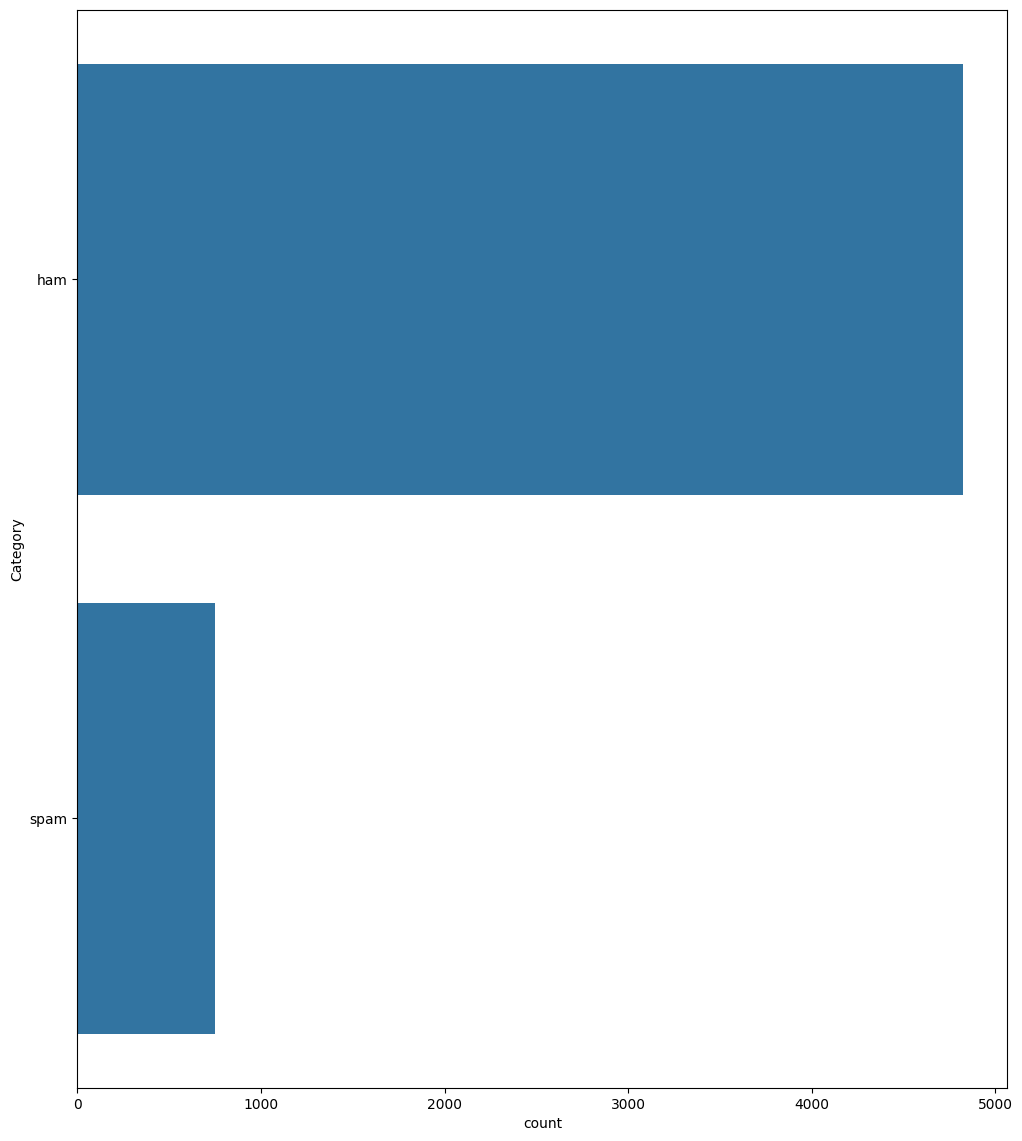

In [57]:
import seaborn as sns
plt.figure(figsize=(12,14))
sns.countplot(data['Category'])

In [58]:
ham_msg = data[data.Category =='ham']
spam_msg = data[data.Category=='spam']

In [59]:
#randomly taking data from ham_ msg
ham_msg=ham_msg.sample(n=len(spam_msg),random_state=42)

In [60]:
print(ham_msg.shape,spam_msg.shape)

(747, 2) (747, 2)


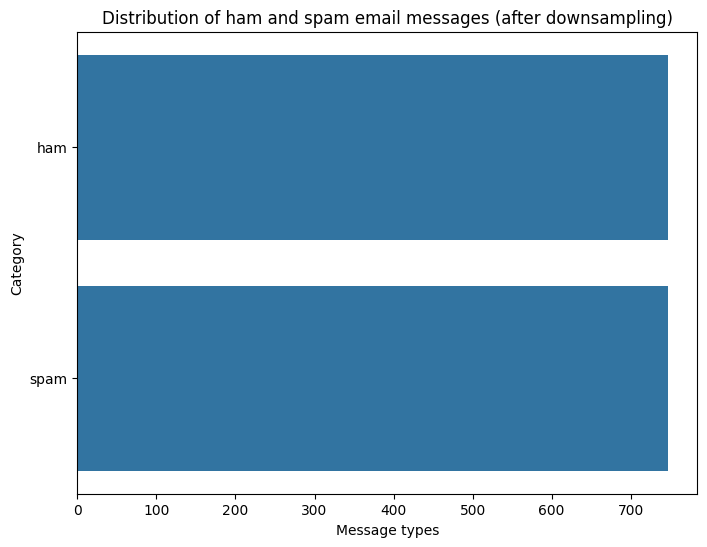

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ham_msg and spam_msg are DataFrame objects
# Concatenate them vertically
balanced_data = pd.concat([ham_msg, spam_msg], ignore_index=True)

# Plot the countplot
plt.figure(figsize=(8,6))
sns.countplot(balanced_data['Category'])
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')
plt.show()


In [65]:
balanced_data.head()

,Category,Message
0,ham,If i not meeting ü all rite then i'll go home ...
1,ham,"I.ll always be there, even if its just in spir..."
2,ham,"Sorry that took so long, omw now"
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...
4,ham,Dunno i juz askin cos i got a card got 20% off...


In [66]:
balanced_data['label']=balanced_data['Category'].map({'ham':0,'spam':1})


In [67]:
train_msg, test_msg, train_labels, test_labels =train_test_split(balanced_data['Message'],balanced_data['label'],test_size=0.2,random_state=434)

In [68]:
vocab_size=500
oov_tok='<OOV>'
max_len=50

In [69]:
#preprocessing making tokens out of text
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(train_msg)

In [70]:
word_index=token.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 '2': 11,
 'and': 12,
 'is': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'in': 17,
 'on': 18,
 'have': 19,
 'ur': 20,
 'of': 21,
 'txt': 22,
 '4': 23,
 'me': 24,
 'are': 25,
 'with': 26,
 'from': 27,
 'text': 28,
 'this': 29,
 'my': 30,
 'get': 31,
 'stop': 32,
 'mobile': 33,
 'just': 34,
 'no': 35,
 'it': 36,
 'will': 37,
 'reply': 38,
 'only': 39,
 'be': 40,
 'that': 41,
 'claim': 42,
 'www': 43,
 'not': 44,
 'out': 45,
 'do': 46,
 'send': 47,
 'new': 48,
 'so': 49,
 'our': 50,
 'we': 51,
 'but': 52,
 'at': 53,
 'prize': 54,
 'can': 55,
 'cash': 56,
 'all': 57,
 'if': 58,
 "i'm": 59,
 'who': 60,
 '150p': 61,
 'uk': 62,
 'go': 63,
 '1': 64,
 'nokia': 65,
 'please': 66,
 'win': 67,
 't': 68,
 'tone': 69,
 'won': 70,
 'week': 71,
 'com': 72,
 'msg': 73,
 '50': 74,
 'was': 75,
 'day': 76,
 'up': 77,
 'phone': 78,
 'by': 79,
 'been': 80,
 'what': 81,
 'want': 82,
 'service': 83,
 'know

In [71]:
padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(train_msg)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [72]:
Testing_seq=token.texts_to_sequences(test_msg)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [73]:
#model
model=tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size,16,input_length=50),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(32,activation='relu'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])

In [75]:
 model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')

In [76]:
epoch=30
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(Trainning_pad, train_labels ,validation_data=(Testing_pad, test_labels),epochs=epoch,callbacks=[early_stop],verbose=2)


Train on 1195 samples, validate on 299 samples
Epoch 1/30
1195/1195 - 1s - loss: 0.6906 - accuracy: 0.6435 - val_loss: 0.6856 - val_accuracy: 0.8829 - 757ms/epoch - 633us/sample
Epoch 2/30


C:\Users\viren\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1195/1195 - 0s - loss: 0.6766 - accuracy: 0.8343 - val_loss: 0.6626 - val_accuracy: 0.8829 - 134ms/epoch - 112us/sample
Epoch 3/30
1195/1195 - 0s - loss: 0.6428 - accuracy: 0.8669 - val_loss: 0.6101 - val_accuracy: 0.8930 - 132ms/epoch - 111us/sample
Epoch 4/30
1195/1195 - 0s - loss: 0.5699 - accuracy: 0.8904 - val_loss: 0.5163 - val_accuracy: 0.8930 - 133ms/epoch - 111us/sample
Epoch 5/30
1195/1195 - 0s - loss: 0.4747 - accuracy: 0.8971 - val_loss: 0.4181 - val_accuracy: 0.8930 - 139ms/epoch - 117us/sample
Epoch 6/30
1195/1195 - 0s - loss: 0.3870 - accuracy: 0.8979 - val_loss: 0.3392 - val_accuracy: 0.9064 - 150ms/epoch - 126us/sample
Epoch 7/30
1195/1195 - 0s - loss: 0.3203 - accuracy: 0.9021 - val_loss: 0.2847 - val_accuracy: 0.9097 - 112ms/epoch - 94us/sample
Epoch 8/30
1195/1195 - 0s - loss: 0.2733 - accuracy: 0.9180 - val_loss: 0.2410 - val_accuracy: 0.9264 - 116ms/epoch - 97us/sample
Epoch 9/30
1195/1195 - 0s - loss: 0.2388 - accuracy: 0.9364 - val_loss: 0.2129 - val_accuracy: 0

In [77]:
model.evaluate(Testing_pad, test_labels)

[0.07742904845537948, 0.9799331]

Text(0.5, 0, 'epoch')

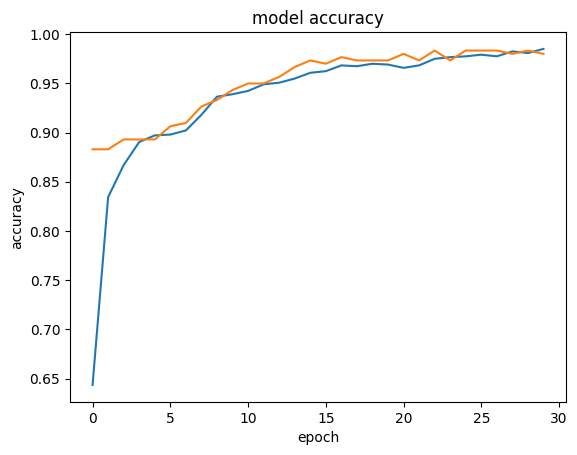

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [79]:
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [80]:
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')
    return (model.predict(padded))
predict_spam(predict_msg)

C:\Users\viren\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[0.00688712],
       [0.0131968 ],
       [0.9998636 ]], dtype=float32)